# Модель классификации новостных заголовков
Последовательность действий:
- скачивание набора данных "20 newsgroups"
- разведочный анализ
- разделение данных на обучающую и тестовую выборки
- векторизация текстовых данных
- обучение логистической регрессии (в целях экономии времени и ресурсов)
- оценка качества модели с помощью метрик accuracy, precision, recall и f1-score

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from wordcloud import WordCloud

In [42]:
data_train = fetch_20newsgroups(
    subset="train",
    shuffle=True,
    random_state=42,
    remove=("headers", "footers", "quotes"),
)

data_test = fetch_20newsgroups(
    subset="test",
    shuffle=True,
    random_state=42,
    remove=("headers", "footers", "quotes"),
)

## Выполним разведочный анализ данных
- визуализация распределения категорий
- вывод текста нескольких документов
- векторизация текста и анализ ключевых слов
- визуализация WordCloud

In [23]:
category_counts = np.bincount(data_train.target)
categories = [data_train.target_names[i] for i in range(len(data_train.target_names))]

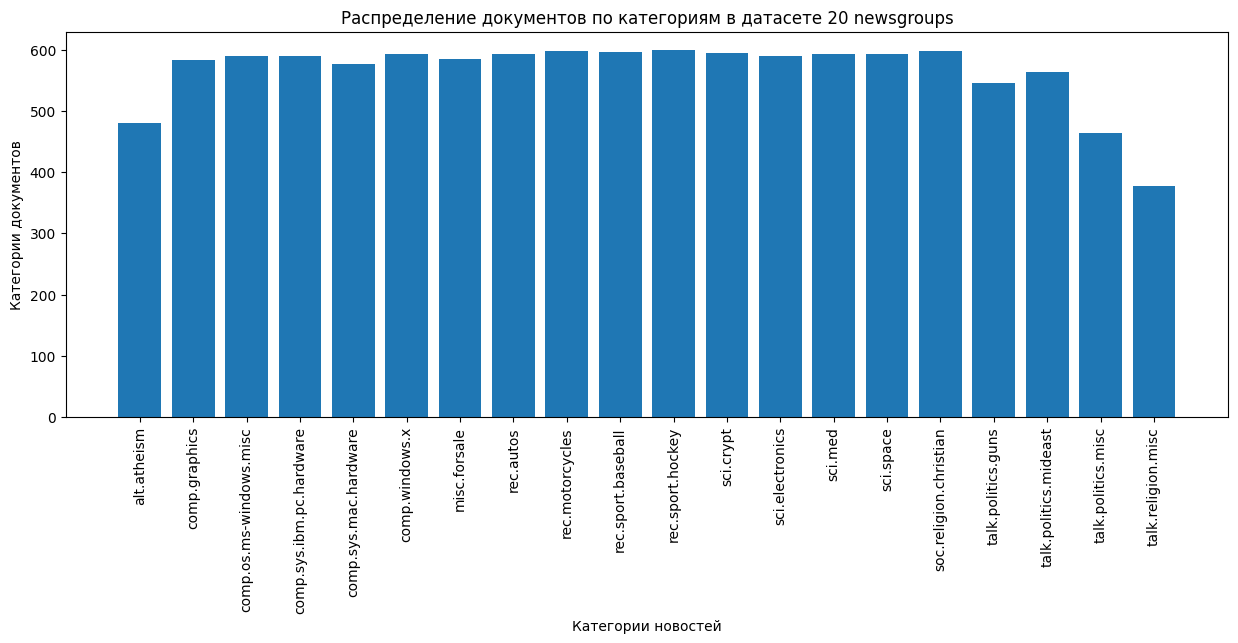

In [24]:
plt.figure(figsize=(15, 5))
plt.bar(categories, category_counts)
plt.xticks(rotation=90)
plt.xlabel("Категории новостей")
plt.ylabel("Категории документов")
plt.title("Распределение документов по категориям в датасете 20 newsgroups")
plt.show()

In [25]:
def print_sample_documents(num_samples=3):
    for i in range(num_samples):
        print(f"Категория: {data_train.target_names[data_train.target[i]]}\n")
        print(f"Текст документа:\n{data_train.data[i]}")
        print("--" * 40)

In [26]:
print_sample_documents()

Категория: rec.autos

Текст документа:
I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.
--------------------------------------------------------------------------------
Категория: comp.sys.mac.hardware

Текст документа:
A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especial

In [43]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
X_train = vectorizer.fit_transform(data_train.data)
X_test = vectorizer.transform(data_test.data)

In [44]:
y_train, y_test = data_train.target, data_test.target

Идентификация наиболее важных слов (по метрике TF-IDF)

In [29]:
tf_idf_max_val = X_train.max(axis=0).toarray().ravel()
sorted_by_tf_idf = tf_idf_max_val.argsort()

feauter_names = np.array(vectorizer.get_feature_names_out())

print("Слова с самым маленьким TF-IDF:")
print(feauter_names[sorted_by_tf_idf[:20]])

print("\nСлова с самым большим TF-IDF:")
print(feauter_names[sorted_by_tf_idf[-20:]])

Слова с самым маленьким TF-IDF:
['fyw' 'y24' '61d' '4tbxom' 'mf3t' '8om' 'h6' '_r' 'o9' 'm9f9fq' '1eqtct'
 '9j5' 'ei4' 'mbs0tq' 'bnh' 'mbxom' 'idk' 'znkjz' 'kjznb' 'mqr']

Слова с самым большим TF-IDF:
['borders' 'theory' 'deletion' 'sig' 'com' 'ass' 'bo' 'ironic' 'huh'
 'just' 'notion' 'auto' 'test' 'say' 'expensive' 'stupid' 'art' 'did'
 'times' 'shipping']


### Визуализация WordCloud

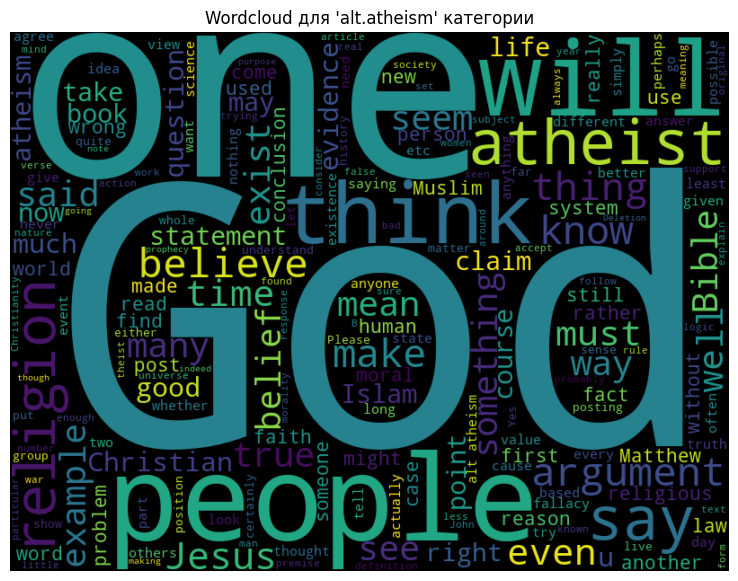

In [33]:
def plot_wordcloud_for_category(category):
    data_category = fetch_20newsgroups(
        subset="train",
        categories=[category],
        remove=("headers", "footers", "quotes"),
    )
    text = " ".join(data_category.data)
    wordcloud = WordCloud(width=800, height=600, background_color="black").generate(text)
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud для '{category}' категории")
    plt.show()


plot_wordcloud_for_category("alt.atheism")

## Обучение и оценка модели Logistic Regression

In [45]:
lg = LogisticRegression(C=5, max_iter=1000)
lg.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=1000)

In [46]:
pred = lg.predict(X_test)
accuracy = accuracy_score(y_test, pred)
precision, recall, fscore, _ = precision_recall_fscore_support(
    y_test, pred, average="weighted"
)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {fscore:.2f}")


Accuracy: 0.68
Precision: 0.69
Recall: 0.68
F1-score: 0.68
